# Item Comparison Lab

### Introduction

In this lesson, we'll practice getting an overview of our data by using video game sales data.  Let's get started.

### Loading our Data

We can begin by loading our data which will come from the [video game sales data](https://www.kaggle.com/datasets/gregorut/videogamesales).

In [1]:
import pandcas as pd
game_sales = pd.read_csv('./vgsales.csv')

Now to explore the dataset, first slice the first few rows of data.

In [2]:
game_sales[:3]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


#### Getting an overview - dimensions, and target

1. Dimensions

Our first step is to identify the dimension of the data.  Here, this may be a bit tricky.  Yes, we are looking at the sales of a game, but what does the year represent?

If we look at the description in Kaggle, it tells us tha the year is the year of the game's release.  This has significance for our future analysis.  If we want to draw conclusions about video game sales, games released a long time ago are probably not too relevant in our initial analysis.  This is because (1) trends may have changed and (2) the sales may be in the aggregate (so if a game is 30 years old it's 30 years of sales), as opposed to a more recent game.   

So it might be nice to select just more recent video games -- but first let's see the the range of years we have in our dataset.

In [10]:
game_sales['Year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

Ok, so we have data up to 2020.  So let's select games only since 2015.

In [11]:
recent_game_sales = game_sales[game_sales['Year'] > 2015]

And then check how many video games we have since that date.

In [12]:
recent_game_sales.shape

(348, 11)

So is it fair to say that we are getting a representation of recent data?  Well we don't know how evenly our data is represented.  We'll talk about distributions later -- but for now, we can plot a histogram of our data by year, with the following.

<AxesSubplot: >

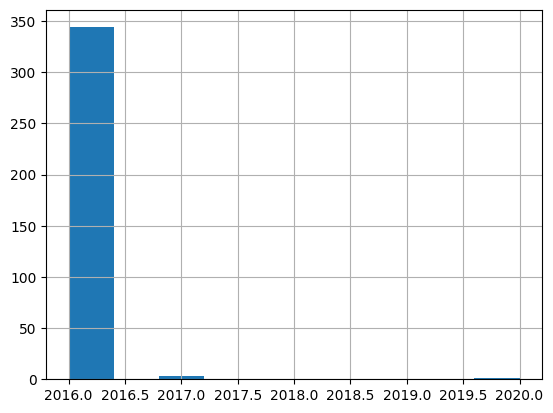

In [13]:
recent_game_sales['Year'].hist()

Ok, this does not look like an even representation.  In fact, it looks like our data effectively ends once we hit 2016.  So let's just collect data from 2010 - 2016, as at least we can be more accurate in saying we have a somewhat substantial sample size of this data.

In [27]:
game_sales_2010_15 = game_sales[(game_sales['Year'] < 2017) & (game_sales['Year'] > 2009)]

<AxesSubplot: >

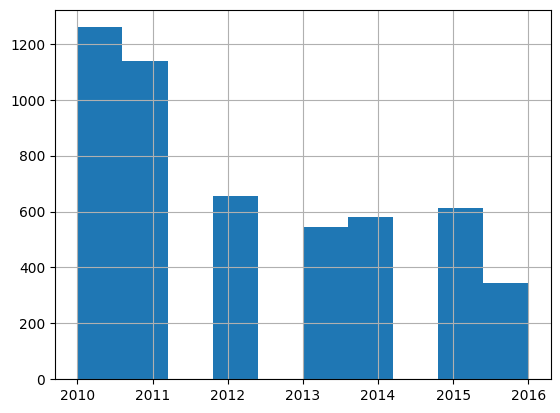

In [28]:
game_sales_2010_15['Year'].hist()

Ok, our data is skewed towards 2010 and 2011 (as almost double the amount of the data comes from these years), and older data is typically less relevant than more recent data.  So let's just select our data from 2012 - 2016.

In [33]:
selected_df = game_sales[(game_sales['Year'] < 2017) & (game_sales['Year'] > 2011)]

Confirm the mix and max years by `describing` the series.

In [130]:
selected_df['Year'].describe()

# count    2743.000000
# mean     2013.796573
# std         1.357166
# min      2012.000000
# 25%      2013.000000
# 50%      2014.000000
# 75%      2015.000000
# max      2016.000000

count    2743.000000
mean     2013.796573
std         1.357166
min      2012.000000
25%      2013.000000
50%      2014.000000
75%      2015.000000
max      2016.000000
Name: Year, dtype: float64

### Choosing a target

Ok, let's take another look at our data.

In [34]:
selected_df[:3]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35


It turns out that selecting a target is also pretty tricky.  It could be that we want to look at NA sales, or maybe we would like to look at global sales.  For now, let's use global sales as our target -- but comparing global vs other markets could reveal some interesting insights.

> For example do certain markets predict sales of others, or do sales differ in a way that a suggests a certain market is underperforming?

### Initial Analysis

Ok, so even though we have some interesting ideas -- let's sick to our plan of starting with a quick breakdown of the data.  Use the `build_and_print` function to get an initial overview.

> This should just be of our `selected_df`, as we specified it was most relevant.

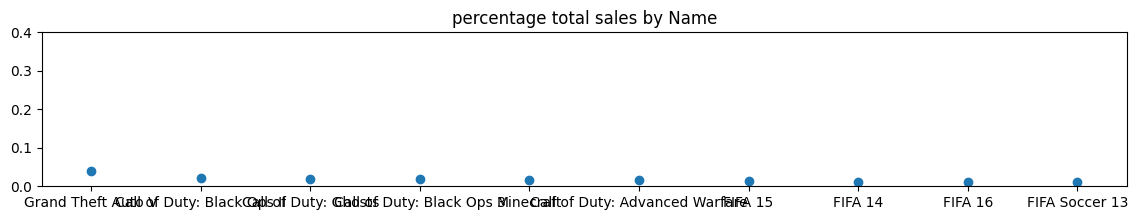

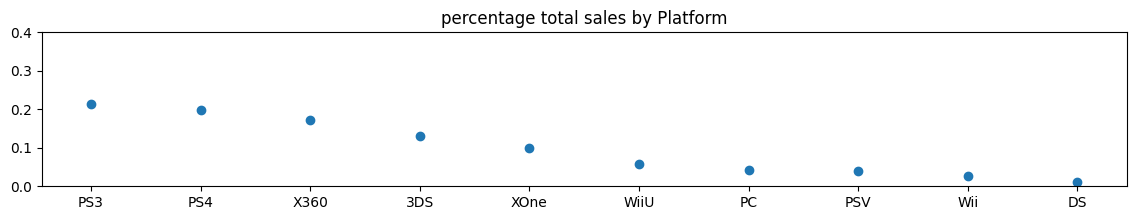

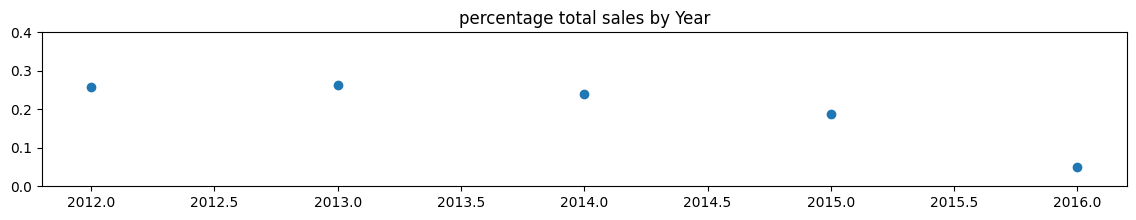

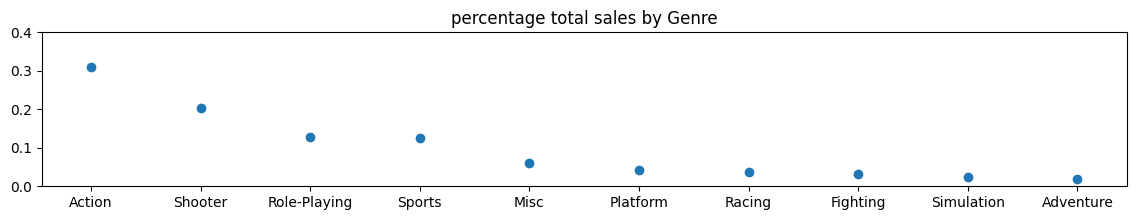

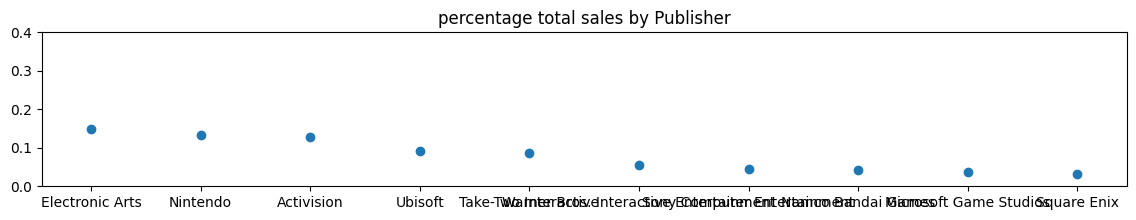

In [36]:
from item_lib import *

cols = ['Name', 'Platform', 'Year', 'Genre', 'Publisher']
target = 'Global_Sales'
agg_name = 'percentage total sales'

results = build_and_print(selected_df, cols, target, agg = 'sum', agg_name = agg_name, y_range=[0, .4])

Ok, so here we do see some significant differences in the data.  Action and shooter games account for most of the sales, and then role-playing/sports seem to be in a tier two.  

Looking at the sales of the popular games it seems to align with that breakdown of genre.  We can also see the breakdown of playstation games.

### Digging Deeper - Multidimensional aggregates

For example, we may want to know if the popularity of action and shooting games is driven by just a couple of games, or more spread out.  So perform a multilevel aggregation below.

In [38]:
cols = ['Genre', 'Name']
target = 'Global_Sales'
agg_name = 'percentage total sales'

build_grouped_by(selected_df, cols, target, agg = 'sum', agg_name = agg_name)[:10]

percentage total sales
Genre   Name                                                  
Action  Grand Theft Auto V                               0.040
Shooter Call of Duty: Black Ops II                       0.021
        Call of Duty: Ghosts                             0.020
        Call of Duty: Black Ops 3                        0.018
Misc    Minecraft                                        0.017
Shooter Call of Duty: Advanced Warfare                   0.016
Sports  FIFA 15                                          0.014
        FIFA 14                                          0.012
        FIFA 16                                          0.012
Action  FIFA Soccer 13                                   0.012

Ok, so the multilevel aggregation didn't provide us too much in this case -- because `Name` is the most atomic unit we already have.  But we can start to see that our data appears somewhat spread out (for example Grand Theft Auto is 4% of total sales) whereas Action is 30% of total sales.

So next, we can perhaps see if certain publishers dominate, by providing a multilevel aggregation on publisher and genre.

In [39]:
cols = ['Genre', 'Publisher']
target = 'Global_Sales'
agg_name = 'percentage total sales'

build_grouped_by(selected_df, cols, target, agg = 'sum', agg_name = agg_name)[:10]

percentage total sales
Genre        Publisher                                                     
Shooter      Activision                                               0.090
Sports       Electronic Arts                                          0.077
Action       Warner Bros. Interactive Entertainment                   0.049
Role-Playing Nintendo                                                 0.044
Action       Ubisoft                                                  0.043
             Take-Two Interactive                                     0.040
Shooter      Electronic Arts                                          0.030
Sports       Take-Two Interactive                                     0.028
Platform     Nintendo                                                 0.026
Shooter      Ubisoft                                                  0.020

### Digging Deeper - Plotting Subsets

So our initial plot of our selected data served the first purpose -- it showed us a few key genres that we should probably familiarize ourselves with -- action and shooter.  And we saw one way of digging deeper on our data -- by performing multilevel aggregates.  

Another way we can dig deeper on that data, is simply by selecting action and shooter genres, and then using our `build_and_print` function again.

In [71]:
recent_action_shooter_df = selected_df[(selected_df['Genre'] == 'Action') | (selected_df['Genre'] == 'Shooter')]

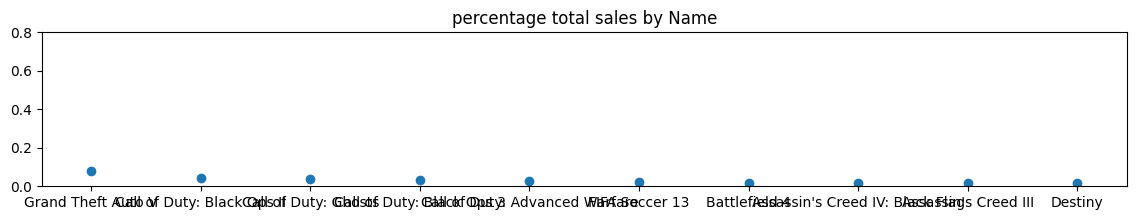

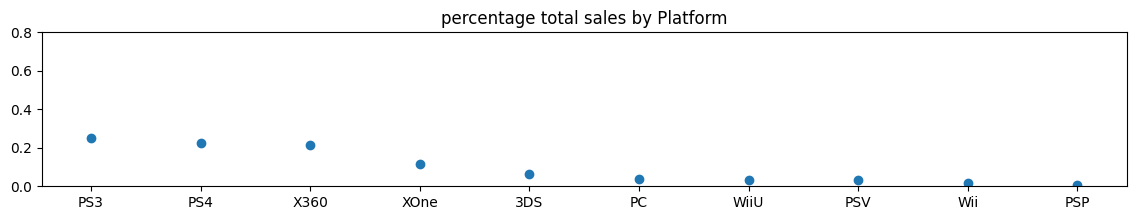

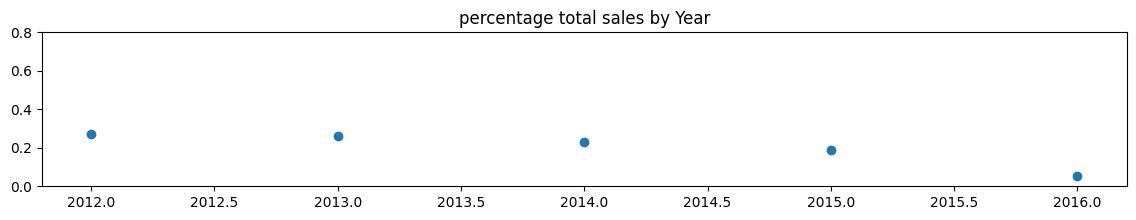

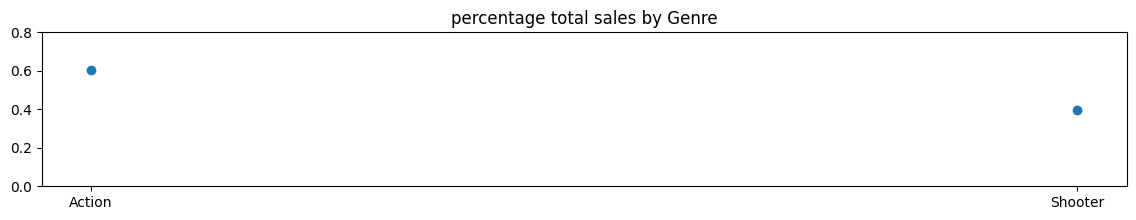

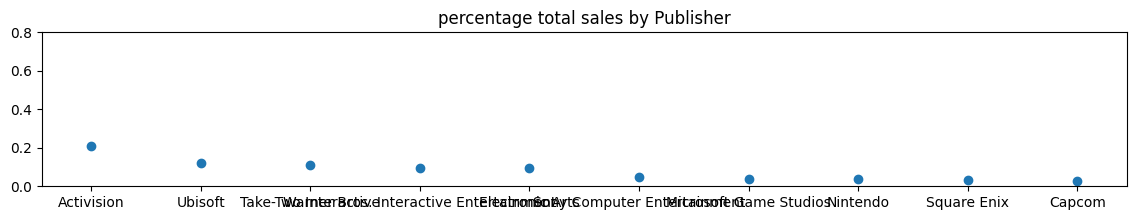

In [47]:
cols = ['Name', 'Platform', 'Year', 'Genre', 'Publisher']
target = 'Global_Sales'
agg_name = 'percentage total sales'

results = build_and_print(recent_action_shooter_df, cols, target, agg = 'sum', agg_name = agg_name, y_range=[0, .8])

Do we see anything interesting here? 

In [49]:
target = 'Global_Sales'
agg_name = 'percentage total sales'
col = 'Publisher'
build_grouped_by(recent_action_shooter_df, col, target, agg = 'sum', agg_name = None, pct = True)[:5]

,sum
Publisher,
Activision,0.211
Ubisoft,0.123
Take-Two Interactive,0.110
Warner Bros. Interactive Entertainment,0.095
Electronic Arts,0.093


In [70]:
target = 'Global_Sales'
agg_name = 'percentage total sales'
col = 'Publisher'
build_grouped_by(selected_df, col, target, agg = 'sum', agg_name = None, pct = True)[:5]

,sum
Publisher,
Electronic Arts,0.148
Nintendo,0.134
Activision,0.129
Ubisoft,0.092
Take-Two Interactive,0.087


### Summary

In this lesson, we saw a couple initial method for getting an overview of our data.

* Checking the dataset

First, we moved through understanding the dimension of the data and choosing a target.  We saw that understanding the dimension of the data was not easy, because the dataset showed revenue of games, but our games were released in different years.  

This led to a discussion of trying to find a *representative* dataset -- and that we preferred more recent data.  So we looked at a distribution of the data, and saw we only had a significant sample of data from 2010 - 2016. 

From there, we just selected data from those years to get an overview of our data.

* Getting an overview

We then went through our method for getting an overview of the data, which was to use our `build_and_print` method to see some important categories of our data.

In [ ]:
results = build_and_print(selected_df, cols, target, agg = 'sum', agg_name = agg_name, y_range=[0, .4])

We saw interesting breakdowns in terms of genre.  And from there, noticed that certain publishers like Activision and Ubisoft have performed well in these genres.

Depending on the scope of our project, it may be worth taking a deeper look at these companies to see how they have achieved this success.

### Resources

[Supermarket Sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

[Ecommerce Behavior](https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store)